# Exploring NarrativeQA

## Summaries.csv

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('/Users/kremerr/Documents/GitHub/narrativeqa/third_party/wikipedia/summaries.csv')

In [4]:
df.head()

,document_id,set,summary,summary_tokenized
0,0025577043f5090cd603c6aea60f26e236195594,test,"Mark Hunter (Slater), a high school student i...","Mark Hunter ( Slater ) , a high school student..."
1,0029bdbe75423337b551e42bb31f9a102785376f,train,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
2,00936497f5884881f1df23f4834f6739552cee8b,train,"A scholar and explorer, Dr. Samuel Ferguson, ...","A scholar and explorer , Dr. Samuel Ferguson ,..."
3,00950a3641e6a28b04a6fabf6334140e2deaa9fd,train,The story begins when a female lovely named O...,The story begins when a female lovely named Ol...
4,00ee9e01a0e581e0d8cbf7e865a895147c480c5e,train,Chev Chelios (Jason Statham) is a Los Angeles...,Chev Chelios ( Jason Statham ) is a Los Angele...


In [18]:
len(df)

1572

In [27]:
max(len(summary) for summary in df['summary'])

6090

In [30]:
for i, summary in enumerate(df['summary']):
    if len(summary)==6090:
        print(i, summary)

1296  In Marseille, an undercover detective is following Alain Charnier (Fernando Rey), a wealthy French criminal who runs the largest heroin-smuggling syndicate in the world. The policeman is assassinated by Charnier's hitman, Pierre Nicoli (Marcel Bozzuffi). Charnier plans to smuggle $32 million worth of heroin into the United States by hiding it in the car of his unsuspecting friend, French television personality Henri Devereaux (Frédéric de Pasquale).
In New York City, detectives Jimmy "Popeye" Doyle (Gene Hackman) and Buddy "Cloudy" Russo (Roy Scheider) are conducting an undercover stakeout in Bedford-Stuyvesant, Brooklyn. After seeing a drug transaction take place in a bar, Cloudy goes in to make an arrest, but the suspect makes a break for it, cutting Cloudy on the arm with a knife. After catching up with their suspect and severely beating him, the detectives interrogate the man, who reveals his drug connection.
Later, Popeye and Cloudy go out for drinks at the Copacabana, where

In [31]:
min(len(summary) for summary in df['summary'])

1126

In [32]:
for i, summary in enumerate(df['summary']):
    if len(summary)==1126:
        print(i, summary)

733  The first two lines are a complete story by themselves:
" The last man on Earth sat alone in a room. There was a knock on the door..."
The Zan have killed off all life on Earth other than pairs of specimens for their zoo of exotic Earth fauna. Walter Phelan is the last man on Earth, but Grace Evans, the last woman, is not overly impressed with him and maintains her distance.
The Zan, who are ageless, become disturbed when, one by one, the other animals begin to die. They turn to Walter for advice. He tells them that the creatures have perished from lack of affection, suggesting that they pet the survivors regularly to keep them alive. He demonstrates with one of them. When the Zan begin to die, they depart the planet in fear. It is then revealed that the creature Walter advised them to pet was a poisonous snake.
Then Walter discusses the future of the human race with Grace. She is shocked by his proposal and leaves as he intended to use the Zan technology left behind to create "th

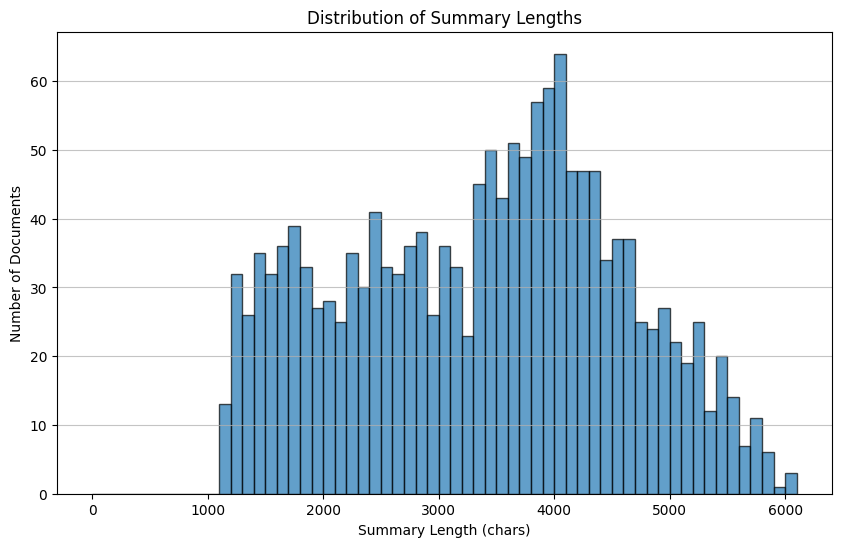

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

df['summary_length'] = df['summary'].apply(len)

# Define buckets for summary lengths
buckets = range(0, max(df['summary_length']) + 100, 100)  # Adjust the step size as necessary

# Plot the distribution of summary lengths
plt.figure(figsize=(10, 6))
plt.hist(df['summary_length'], bins=buckets, edgecolor='k', alpha=0.7)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length (chars)')
plt.ylabel('Number of Documents')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [16]:
from collections import Counter
cnt = Counter()
for set in (df['set'].unique()):
    for row in df['set']:
        if row == set:
            cnt[set] +=1


In [37]:
cnt

Counter({'train': 1102, 'test': 355, 'valid': 115})

In [38]:
df.head()

,document_id,set,summary,summary_tokenized,summary_length
0,0025577043f5090cd603c6aea60f26e236195594,test,"Mark Hunter (Slater), a high school student i...","Mark Hunter ( Slater ) , a high school student...",3051
1,0029bdbe75423337b551e42bb31f9a102785376f,train,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S...",5098
2,00936497f5884881f1df23f4834f6739552cee8b,train,"A scholar and explorer, Dr. Samuel Ferguson, ...","A scholar and explorer , Dr. Samuel Ferguson ,...",2363
3,00950a3641e6a28b04a6fabf6334140e2deaa9fd,train,The story begins when a female lovely named O...,The story begins when a female lovely named Ol...,2241
4,00ee9e01a0e581e0d8cbf7e865a895147c480c5e,train,Chev Chelios (Jason Statham) is a Los Angeles...,Chev Chelios ( Jason Statham ) is a Los Angele...,4305


## Qaps.csv

In [40]:
qaps = pd.read_csv('/Users/kremerr/Documents/GitHub/narrativeqa/qaps.csv')

In [41]:
qaps.head()

,document_id,set,question,answer1,answer2,question_tokenized,answer1_tokenized,answer2_tokenized
0,0025577043f5090cd603c6aea60f26e236195594,test,Who is Mark Hunter?,He is a high school student in Phoenix.,A loner and outsider student with a radio stat...,Who is Mark Hunter ?,He is a high school student in Phoenix .,A loner and outsider student with a radio stat...
1,0025577043f5090cd603c6aea60f26e236195594,test,Where does this radio station take place?,It takes place in Mark's parents basement.,"Phoenix, Arizona",Where does this radio station take place ?,It takes place in Mark s parents basement .,"Phoenix , Arizona"
2,0025577043f5090cd603c6aea60f26e236195594,test,Why do more students tune into Mark's show?,Mark talks about what goes on at school and in...,Because he has a thing to say about what is ha...,Why do more students tune into Mark s show ?,Mark talks about what goes on at school and in...,Because he has a thing to say about what is ha...
3,0025577043f5090cd603c6aea60f26e236195594,test,Who commits suicide?,Malcolm.,Malcolm.,Who commits suicide ?,Malcolm .,Malcolm .
4,0025577043f5090cd603c6aea60f26e236195594,test,What does Paige jam into her microwave?,She jams her medals and accolades.,Her award medals,What does Paige jam into her microwave ?,She jams her medals and accolades .,Her award medals
